<a href="https://colab.research.google.com/github/NiteeshSingh/SOC-Season-Of-Codes/blob/main/PyTorch_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

pd.set_option('max_columns', None)


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


##Tensors

In [ ]:
# Get cpu or gpu device 
device = "cuda" if torch.cuda.is_available() else "cpu"

###initialization

In [ ]:
#initializing using data
# specify specific datatype using --> ***dtype=torch.float32***
# specify device type like cpu or gpu using --> ***device = "cuda" or "cpu"*** whichever you want and is available
# specify if you want gradient  using  ----> ***requires_grad=True***
tensor1 = torch.tensor([[2, 3], [1, 6]], dtype=torch.float32, device=device, requires_grad=True)
display(" -- from data -- ", tensor1)

#from numpy array 
#note it doesn't take other keyword argument except numpy array
#the tensor and numpy array shares the same memory changing the one changes the other 
tensor2 = torch.from_numpy(np.array([[7, 8], [9, 0]]))
display("-- from numpy -- ", tensor2)

#initiazing using
#torch.rand
#torch.ones
#torch.zeros

#these takes a shape argument defining the shape
shape = (2, 3)

tensor_rand = torch.rand(shape, generator=None, dtype=None, device=device, requires_grad=False)
display("-- from torch.rand() -- ", tensor_rand)

tensor_ones = torch.ones(shape, dtype=None, device=device, requires_grad=False)
display("-- from torch.ones() -- ", tensor_ones)

tensor_zeros = torch.zeros(shape, dtype=None, device=device, requires_grad=False)
display("-- from torch.zeros() -- ", tensor_zeros)

#initializing using 
#torch.rand_like()
#torch.ones_like()
#torch.zeros_like()

#takes in an existing tensor and creates 
#new tensor of all other attributes [shape, dtype, layout, device] same as passed tensor
tensor_rand_like = torch.rand_like(tensor1,)
display("-- from torch.rand_like() -- ", tensor_rand_like)

' -- from data -- '

tensor([[2., 3.],
        [1., 6.]], requires_grad=True)

'-- from numpy -- '

tensor([[7, 8],
        [9, 0]])

'-- from torch.rand() -- '

tensor([[0.0632, 0.9931, 0.9952],
        [0.0410, 0.7532, 0.8232]])

'-- from torch.ones() -- '

tensor([[1., 1., 1.],
        [1., 1., 1.]])

'-- from torch.zeros() -- '

tensor([[0., 0., 0.],
        [0., 0., 0.]])

'-- from torch.rand_like() -- '

tensor([[0.2173, 0.5789],
        [0.5314, 0.8819]])

###Attributes

Tensor has following atttributes

* .dtype
* .shape
* .device
* .requires_grad
* .layout      --> to check if strided or sparse layout

In [ ]:
print(f"Shape of tensor: {tensor_rand.shape}")
print(f"Datatype of tensor: {tensor_rand.dtype}")
print(f"Device tensor is stored on: {tensor_rand.device}")
print(f"Tensors require_grad attribute is : {tensor_rand.requires_grad}")
print(f"Layout of tensor is : {tensor_rand.layout}")

Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu
Tensors require_grad attribute is : False
Layout of tensor is : torch.strided


###Operations

[all oerations available here](https://pytorch.org/docs/stable/torch.html#)

#####moving tensor from cpu to cuda device

In [ ]:
if torch.cuda.is_available():
    tensor_rand = tensor_rand.to("cuda")

#####indexing similar to numy

In [ ]:
tensor = torch.rand(4, 4)
display(f"First row: {tensor[0]}")
display(f"First column: {tensor[:, 0]}")
display(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
display(tensor)

'First row: tensor([0.0152, 0.3100, 0.5704, 0.6453])'

'First column: tensor([0.0152, 0.6208, 0.6802, 0.4693])'

'Last column: tensor([0.6453, 0.1913, 0.0141, 0.9790])'

tensor([[0.0152, 0.0000, 0.5704, 0.6453],
        [0.6208, 0.0000, 0.4448, 0.1913],
        [0.6802, 0.0000, 0.5879, 0.0141],
        [0.4693, 0.0000, 0.6907, 0.9790]])

#####joining tensors

In [ ]:
#concating
tensor5 = torch.ones((1, 3))
tensor5[:, 2] = 0
print(tensor5)

tensor5_cat = torch.cat([tensor5, tensor5, tensor5], dim=0)
tensor5_cat

tensor([[1., 1., 0.]])


tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]])

#####airtmetic operations

In [ ]:
a = torch.tensor([[1, 0], [0, 1]])
print(a)
b = torch.tensor([[1,2], [3, 4]])#, dtype=torch.float16)
print(b)

display(a@b) 
#matrix multiplication
#similar to //  ab = a.matmul(b)


display(a*b)
#elementwise multiplication
#similar to //  ab = a.mul(b)

display(a+b)
#addition
#similar to //  a_b = a.add(b)

tensor([[1, 0],
        [0, 1]])
tensor([[1, 2],
        [3, 4]])


tensor([[1, 2],
        [3, 4]])

tensor([[1, 0],
        [0, 4]])

tensor([[2, 2],
        [3, 5]])

#####inplace math operations

In [ ]:
print(a)
a.add_(3)
print(a)
a.add_(torch.tensor([10, 10]))#notice brodcating 
print(a)

tensor([[1, 0],
        [0, 1]])
tensor([[4, 3],
        [3, 4]])
tensor([[14, 13],
        [13, 14]])


##AUTOGRAD

In [ ]:
x = torch.tensor(np.arange(0, 50, 1), dtype=torch.float32, requires_grad=True)
print(x)

x_2 = x**2
print(x_2)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49.], requires_grad=True)
tensor([0.0000e+00, 1.0000e+00, 4.0000e+00, 9.0000e+00, 1.6000e+01, 2.5000e+01,
        3.6000e+01, 4.9000e+01, 6.4000e+01, 8.1000e+01, 1.0000e+02, 1.2100e+02,
        1.4400e+02, 1.6900e+02, 1.9600e+02, 2.2500e+02, 2.5600e+02, 2.8900e+02,
        3.2400e+02, 3.6100e+02, 4.0000e+02, 4.4100e+02, 4.8400e+02, 5.2900e+02,
        5.7600e+02, 6.2500e+02, 6.7600e+02, 7.2900e+02, 7.8400e+02, 8.4100e+02,
        9.0000e+02, 9.6100e+02, 1.0240e+03, 1.0890e+03, 1.1560e+03, 1.2250e+03,
        1.2960e+03, 1.3690e+03, 1.4440e+03, 1.5210e+03, 1.6000e+03, 1.6810e+03,
        1.7640e+03, 1.8490e+03, 1.9360e+03, 2.0250e+03, 2.1160e+03, 2.2090e+03,
        2.3040e+03, 2.4010e+03], grad_fn=<PowBackward0>)


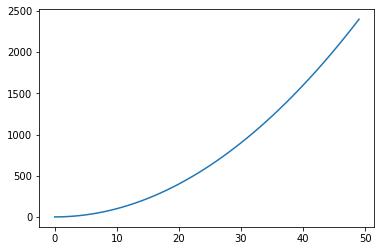

In [ ]:
plt.plot(x.detach(), x_2.detach())

In [ ]:
y = sum(x_2)
y.backward()

In [ ]:
x.grad //2x

tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
        28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52., 54.,
        56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76., 78., 80., 82.,
        84., 86., 88., 90., 92., 94., 96., 98.])

In [ ]:
i=25
point = x.detach()[i].numpy()
value = x_2.detach()[i].numpy()
slope = x.grad.detach()[i].numpy()
print(point, value, slope)
x_range = np.linspace(point-5, point+5, 20)
y_range = slope*(x_range-point)+value #line(slope, point, value)
print(x_range, y_range)


25.0 625.0 50.0
[20.         20.52631579 21.05263158 21.57894737 22.10526316 22.63157895
 23.15789474 23.68421053 24.21052632 24.73684211 25.26315789 25.78947368
 26.31578947 26.84210526 27.36842105 27.89473684 28.42105263 28.94736842
 29.47368421 30.        ] [375.         401.31578947 427.63157895 453.94736842 480.26315789
 506.57894737 532.89473684 559.21052632 585.52631579 611.84210526
 638.15789474 664.47368421 690.78947368 717.10526316 743.42105263
 769.73684211 796.05263158 822.36842105 848.68421053 875.        ]


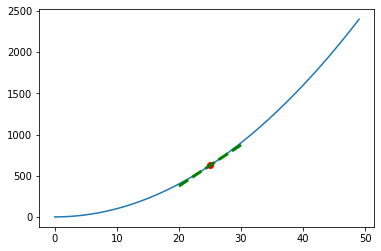

In [ ]:
plt.plot(x.detach(), x_2.detach())
plt.scatter([point], [value], color="red")
plt.plot(x_range, y_range, '--', linewidth = 3, color="green")

##Dataset and DataLoader

using mushroom classification dataset

[learn about data](https://www.kaggle.com/datasets/uciml/mushroom-classification/code?datasetId=478&sortBy=voteCount)

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

####preprocessing and loading data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mushrooms.csv')

In [ ]:
data.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

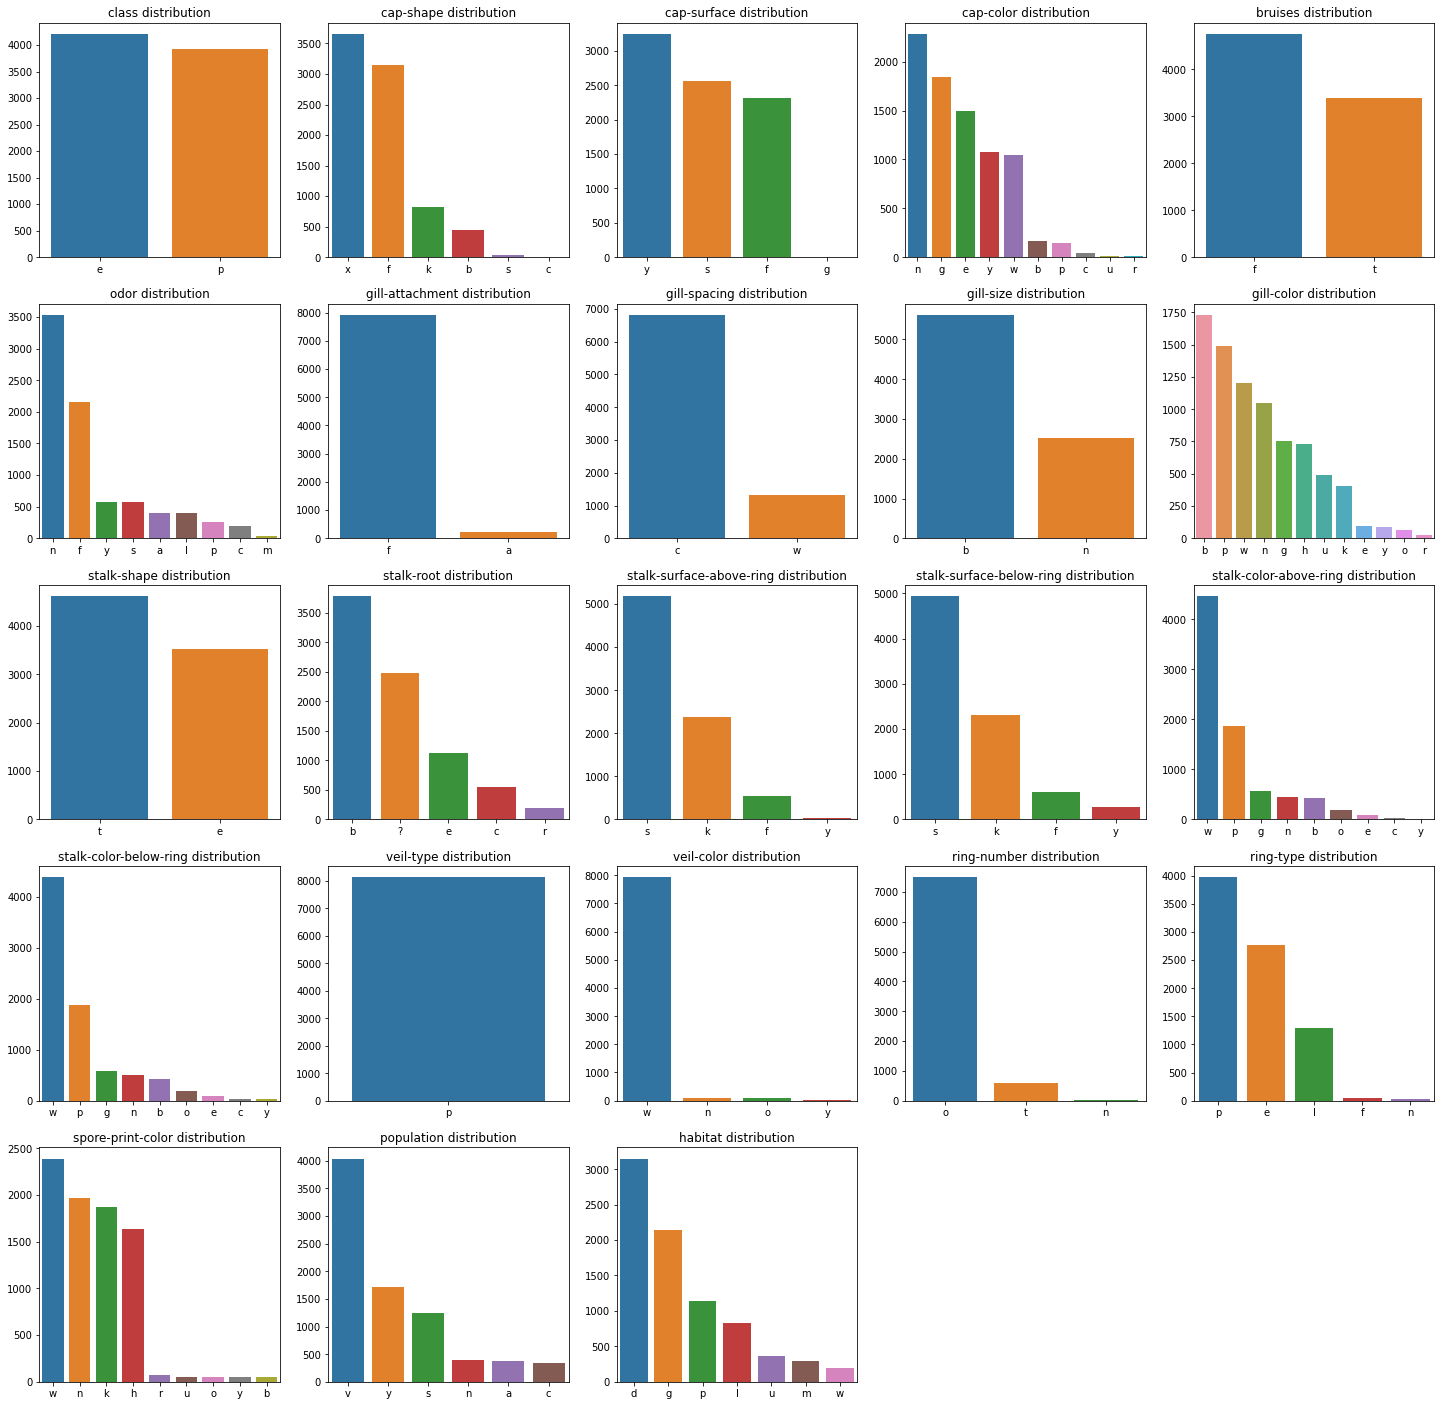

In [ ]:
plt.figure(figsize=(25,25))
for i, column in enumerate(data.columns):
  counts = data[column].value_counts()
  plt.subplot(5,5,i+1)
  sns.barplot(x=counts.index, y=counts.values)
  plt.title(f"{counts.name} distribution")
  # plt.axis('off')

from above we can clearly remove veil type distribution from our data becuase its constant value

In [ ]:
columns = data.columns
X = data.copy()
y = X.pop('class')
X.drop('veil-type', inplace=True)

type(X), type(y), X.shape

(pandas.core.frame.DataFrame, pandas.core.series.Series, (8124, 22))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)
x_train.shape, x_test.shape, type(x_train), type(y_train)

((6499, 22), (1625, 22), numpy.ndarray, numpy.ndarray)

In [ ]:
def encode_inputs(x_train, x_test):
  oe = OrdinalEncoder()
  oe.fit(x_train)
  return (oe.transform(x_train), oe.transform(x_test))

def encode_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  return(le.transform(y_train), le.transform(y_test))

In [ ]:
x_train_e, x_test_e = encode_inputs(x_train, x_test)
y_train_e, y_test_e = encode_targets(y_train, y_test)

type(x_train_e), type(x_train_e[0, 0])

(numpy.ndarray, numpy.float64)

####Building Dataset class and Dataloader iterable

In [ ]:
class MyDataset(Dataset):
  def __init__(self, X, y, transform=None):
    self.X = X
    self.y = y
    self.transform = transform

  def __len__(self):
    return len(self.X)
  
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    
    sample = {'data':self.X[idx], 'target':self.y[idx]}

    if self.transform:
      sample = transform(sample)
    
    return sample
  

In [ ]:
#to apply a transfromation to a data make custom classes

class to_tensor(object):
  def __init__(self):
    self = self
  def __call__(self, sample):
    sample['data'] = torch.tensor(sample['data'], device=device)
    sample['target'] = torch.tensor(sample['target'], device=device)
    return sample

transform = transforms.Compose([to_tensor()])

In [ ]:
dataset = MyDataset(x_train_e, y_train_e, transform)
type(dataset)

__main__.MyDataset

In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=32,
                        shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=32,
                        shuffle=False, num_workers=0)

##Model Building

In [ ]:
from torch import nn
import time
import copy
import torch.optim as optim
from torch.optim import lr_scheduler

In [ ]:
dataloaders = {'train':train_dataloader, 'val':val_dataloader}
dataset_sizes = {'train':train_size, 'val':val_size}

In [ ]:
def train_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for sample in dataloaders[phase]:
                inputs = sample['data'].to(device)
                labels = sample['target'].to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
input_featurs = x_train.shape[1]

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(input_featurs, 32, device=device, dtype=torch.float64),
        nn.ReLU(),
        nn.Linear(32, 64, device=device, dtype=torch.float64),
        nn.ReLU(),
        nn.Linear(64, 2, device=device, dtype=torch.float64),
        nn.ReLU(),
        nn.Softmax(dim=1)
    )

  def forward(self, x):
    logits = self.linear_relu_stack(x)
    return logits
model = Model()
model

Model(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=22, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=2, bias=True)
    (5): ReLU()
    (6): Softmax(dim=1)
  )
)

In [ ]:
l = [module for module in model.modules() if not isinstance(module, nn.Sequential)]
l

[Model(
   (linear_relu_stack): Sequential(
     (0): Linear(in_features=22, out_features=32, bias=True)
     (1): ReLU()
     (2): Linear(in_features=32, out_features=2, bias=True)
     (3): Softmax(dim=None)
   )
 ),
 Linear(in_features=22, out_features=32, bias=True),
 ReLU(),
 Linear(in_features=32, out_features=2, bias=True),
 Softmax(dim=None)]

In [ ]:
# for sample in dataloaders['train']:
#     print(sample['data'].shape)

In [ ]:
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model = train_model(model, dataloaders, dataset_sizes, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25);

Epoch 0/24
----------
train Loss: 0.6831 Acc: 0.5114
val Loss: 0.6669 Acc: 0.5146

Epoch 1/24
----------
train Loss: 0.6529 Acc: 0.5116
val Loss: 0.6404 Acc: 0.5146

Epoch 2/24
----------
train Loss: 0.6298 Acc: 0.5268
val Loss: 0.6183 Acc: 0.5538

Epoch 3/24
----------
train Loss: 0.6096 Acc: 0.5809
val Loss: 0.5961 Acc: 0.6308

Epoch 4/24
----------
train Loss: 0.5880 Acc: 0.6580
val Loss: 0.5689 Acc: 0.7577

Epoch 5/24
----------
train Loss: 0.5239 Acc: 0.8563
val Loss: 0.4909 Acc: 0.8692

Epoch 6/24
----------
train Loss: 0.4793 Acc: 0.8671
val Loss: 0.4649 Acc: 0.8754

Epoch 7/24
----------
train Loss: 0.4664 Acc: 0.8715
val Loss: 0.4631 Acc: 0.8762

Epoch 8/24
----------
train Loss: 0.4645 Acc: 0.8715
val Loss: 0.4612 Acc: 0.8777

Epoch 9/24
----------
train Loss: 0.4627 Acc: 0.8727
val Loss: 0.4595 Acc: 0.8785

Epoch 10/24
----------
train Loss: 0.4610 Acc: 0.8732
val Loss: 0.4579 Acc: 0.8792

Epoch 11/24
----------
train Loss: 0.4593 Acc: 0.8750
val Loss: 0.4563 Acc: 0.8800

Ep

##Tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs')

In [ ]:
ex_sample = next(iter(train_dataloader))
ex_data, ex_label = ex_sample['data'], ex_sample['target']
writer.add_graph(model, ex_data)
writer.close()

In [ ]:
!tensorboard --logdir=runs

2022-07-03 11:12:03.064153: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 276, in main
    return runner(self.flags) or 0
  File "/usr/local/lib/python3.7/